INTRODUCTION.
In this notebook, we explore the data of global surface temperature on Earth. This is one of my first few toy project where I take as a platform to practise what I've learnt so far.

Start by calling all the necessary python libaries needed to to analyse your data

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as ma

Load all the data formats in this case CSV files

In [11]:
globaltemp = pd.read_csv("E:\Data science materials\Project 1\GlobalTemperatures.csv", index_col='dt', parse_dates=True)
globaltempstate = pd.read_csv("E:\Data science materials\Project 1\GlobalLandTemperaturesByState.csv", index_col='dt', parse_dates=True)
globaltempmcity = pd.read_csv("E:\Data science materials\Project 1\GlobalLandTemperaturesByMajorCity.csv", index_col='dt', parse_dates=True)
globaltempcountry = pd.read_csv("E:\Data science materials\Project 1\GlobalLandTemperaturesByCountry.csv", index_col='dt', parse_dates=True)
globaltempcity = pd.read_csv("E:\Data science materials\Project 1\GlobalLandTemperaturesByCity.csv", index_col='dt', parse_dates=True)

globaltemp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


EXAMINE THE DATA

Here perform simple function to larn more about the data by displaying the first 5 rows and all columns in the global temp dataset

In [12]:
globaltemp.tail()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


Here perform simple function to learn more about the data by displaying the last 5 rows and all columns in the global temp dataset

In [13]:
globaltemp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     3180 non-null   float64
 1   LandAverageTemperatureUncertainty          3180 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 224.4 KB


Here perform simple function to learn more about the data by displaying the contents of the rows and columns in the global temp dataset
From this table one may already make a lot of observations. We won't state everything here but only give few examples:

There was a period of time where the Earth was far colder than now. This can be inferred from, for example, by looking at the min of LandAverageTemperature, which is equal to -2.08 degree (in Celcius); or by looking at the min of LandMaxTemperature, which is equal to 5.9 degree.

Overall, the Earth is not too hot throughout the whole period of time. If we look at the max of the LandMaxTemperature, it is only equal to 21.32 degree, a pretty comfortable temperature for living. \ (Of course, this does not mean that it won't be hotter in the future. To get an idea of the trend for the change of temperature, one may need to plot a graph. We will do this in the data-visualization section below.)

When the ocean is also included, the fluctuation of the temperature becomes smaller. We infer this, for example, by comparing the standard deviations std of LandAverageTemperatureUncertainty, which is 1.09644, and that of LandAndOceanAverageTemperatureUncertainty which is 0.073587. The latter is clearly smaller than the former. \ We also infer this by comparing the five-number summary of the two columns above. The 1st and 3rd quartile, the median, and the maximum of the land-and-ocean one are all lower than those of the land-alone one. The minimum, although being higher, is also not too far different.


In [14]:
globaltemp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


Here perform simple function to learn more about the data by displaying the first 5 rows and all columns in the global temp dataset

For the convenience of easy typing we will first rename the columns as follow:

In [15]:
globaltemp.rename(columns={
    'LandAverageTemperature'                   :'landavgtemp', 
    'LandAverageTemperatureUncertainty'        :'landavgtemp2sigmas', 
    'LandMaxTemperature'                       :'landmaxtemp',
    'LandMaxTemperatureUncertainty'            :'landmaxtemp2sigmas', 
    'LandMinTemperature'                       :'landmintemp', 
    'LandMinTemperatureUncertainty'            :'landmintemp2sigmas', 
    'LandAndOceanAverageTemperature'           :'landoceanavgtemp', 
    'LandAndOceanAverageTemperatureUncertainty':'landoceanavgtemp2sigmas'
}, inplace=True) 

In [16]:
globaltemp.head()

,landavgtemp,landavgtemp2sigmas,landmaxtemp,landmaxtemp2sigmas,landmintemp,landmintemp2sigmas,landoceanavgtemp,landoceanavgtemp2sigmas
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


As we have seen above, every column has some missing values. One can print the number of missing values using the code below:

In [17]:
globaltemp.isnull().sum()

landavgtemp                  12
landavgtemp2sigmas           12
landmaxtemp                1200
landmaxtemp2sigmas         1200
landmintemp                1200
landmintemp2sigmas         1200
landoceanavgtemp           1200
landoceanavgtemp2sigmas    1200
dtype: int64

As we have seen above, every column has some missing values. One can print the number of missing values using the code below:

In [18]:
globaltemp[["landavgtemp","landavgtemp2sigmas"]].loc [globaltemp.landavgtemp.isnull()]

,landavgtemp,landavgtemp2sigmas
dt,,
1750-11-01,NaN,NaN
1751-05-01,NaN,NaN
1751-07-01,NaN,NaN
1751-10-01,NaN,NaN
1751-11-01,NaN,NaN
1751-12-01,NaN,NaN
1752-02-01,NaN,NaN
1752-05-01,NaN,NaN
1752-06-01,NaN,NaN


Incidentally, we find that these rows where landavgtemp has null values, are also the rows where landavgtemp2sigmas has missing values.

We find that the missing values are all within the first few years when the data was started being collected. One of these is in year 1750, five in 1751, and the remaining six are in 1752. Some are in consecutive months.

To fill in these missing values, we shall make the following assumptions: The temperature varies continuously, and in an approximately linear fashion. These assumptions are not unreasonable, and they allow us to interpolate in a simple way. For example, for the missing temperature in Nov 1750, we may take the average of temperatures in Oct 1750 and Dec 1750. The same can be done for the other non-consecutive months.

We fill in the missing values by using the .at function. \ (Note: Since we have set parse_dates=True when we loaded the data, the indices of the DataFrame (which are the dates) are no longer of object dtype; i.e. they are no longer strings. We cannot simply input '1750-11-01' into the first argument of .at[] function. Instead, we need also to apply a function conveniently provided in Pandas called .to_datetime() to transform the string into the desired dtype.)

In [19]:
globaltemp.at[pd.to_datetime('1750-11-01'),'landavgtemp'] = (globaltemp.at[pd.to_datetime('1750-10-01'),'landavgtemp'] + globaltemp.at[pd.to_datetime('1750-12-01'),'landavgtemp']) / 2
globaltemp.at[pd.to_datetime('1751-05-01'),'landavgtemp'] = (globaltemp.at[pd.to_datetime('1751-04-01'),'landavgtemp'] + globaltemp.at[pd.to_datetime('1751-06-01'),'landavgtemp']) / 2
globaltemp.at[pd.to_datetime('1751-07-01'),'landavgtemp'] = (globaltemp.at[pd.to_datetime('1751-06-01'),'landavgtemp'] + globaltemp.at[pd.to_datetime('1751-08-01'),'landavgtemp']) / 2
globaltemp.at[pd.to_datetime('1752-02-01'),'landavgtemp'] = (globaltemp.at[pd.to_datetime('1752-01-01'),'landavgtemp'] + globaltemp.at[pd.to_datetime('1752-03-01'),'landavgtemp']) / 2

In [20]:
"""
temp_data[['land_avg_temp','land_avg_temp_2sigmas']].loc[[
    pd.to_datetime('1750-11-01'),
    pd.to_datetime('1751-05-01'),
    pd.to_datetime('1751-07-01'),
    pd.to_datetime('1752-02-01')
]]
"""

"\ntemp_data[['land_avg_temp','land_avg_temp_2sigmas']].loc[[\n    pd.to_datetime('1750-11-01'),\n    pd.to_datetime('1751-05-01'),\n    pd.to_datetime('1751-07-01'),\n    pd.to_datetime('1752-02-01')\n]]\n"

Incidentally, we find that these rows where land_avg_temp has null values, are also the rows where land_avg_temp_2sigmas has missing values.

We find that the missing values are all within the first few years when the data was started being collected. One of these is in year 1750, five in 1751, and the remaining six are in 1752. Some are in consecutive months.

To fill in these missing values, we shall make the following assumptions: The temperature varies continuously, and in an approximately linear fashion. These assumptions are not unreasonable, and they allow us to interpolate in a simple way. For example, for the missing temperature in Nov 1750, we may take the average of temperatures in Oct 1750 and Dec 1750. The same can be done for the other non-consecutive months.

We fill in the missing values by using the .at function. \ (Note: Since we have set parse_dates=True when we loaded the data, the indices of the DataFrame (which are the dates) are no longer of object dtype; i.e. they are no longer strings. We cannot simply input '1750-11-01' into the first argument of .at[] function. Instead, we need also to apply a function conveniently provided in Pandas called .to_datetime() to transform the string into the desired dtype.)

In [21]:
#For Oct, Nov, Dec 1751
# d1 = 'difference 1'
d1 = (globaltemp.at[pd.to_datetime('1752-01-01'),'landavgtemp'] - globaltemp.at[pd.to_datetime('1751-09-01'),'landavgtemp']) / 4
globaltemp.at[pd.to_datetime('1751-10-01'),'landavgtemp'] = globaltemp.at[pd.to_datetime('1751-09-01'),'landavgtemp'] + 1*d1
globaltemp.at[pd.to_datetime('1751-11-01'),'landavgtemp'] = globaltemp.at[pd.to_datetime('1751-09-01'),'landavgtemp'] + 2*d1
globaltemp.at[pd.to_datetime('1751-12-01'),'landavgtemp'] = globaltemp.at[pd.to_datetime('1751-09-01'),'landavgtemp'] + 3*d1
# For May, Jun, Jul, Aug, Sep 1752
# d2 = 'difference 2'
d2 = (globaltemp.at[pd.to_datetime('1752-10-01'),'landavgtemp'] - globaltemp.at[pd.to_datetime('1752-04-01'),'landavgtemp']) / 6
globaltemp.at[pd.to_datetime('1752-05-01'),'landavgtemp'] = globaltemp.at[pd.to_datetime('1752-04-01'),'landavgtemp'] + 1*d2
globaltemp.at[pd.to_datetime('1752-06-01'),'landavgtemp'] = globaltemp.at[pd.to_datetime('1752-04-01'),'landavgtemp'] + 2*d2
globaltemp.at[pd.to_datetime('1752-07-01'),'landavgtemp'] = globaltemp.at[pd.to_datetime('1752-04-01'),'landavgtemp'] + 3*d2
globaltemp.at[pd.to_datetime('1752-08-01'),'landavgtemp'] = globaltemp.at[pd.to_datetime('1752-04-01'),'landavgtemp'] + 4*d2
globaltemp.at[pd.to_datetime('1752-09-01'),'landavgtemp'] = globaltemp.at[pd.to_datetime('1752-04-01'),'landavgtemp'] + 6*d2
"""
globaltemp[['landavgtemp','landavgtemp2sigmas']].loc[[
    pd.to_datetime('1751-10-01'),
    pd.to_datetime('1751-11-01'),
    pd.to_datetime('1751-12-01'),
    pd.to_datetime('1752-05-01'),
    pd.to_datetime('1752-06-01'),
    pd.to_datetime('1752-07-01'),
    pd.to_datetime('1752-08-01'),
    pd.to_datetime('1752-09-01')
]]
"""

"\nglobaltemp[['landavgtemp','landavgtemp2sigmas']].loc[[\n    pd.to_datetime('1751-10-01'),\n    pd.to_datetime('1751-11-01'),\n    pd.to_datetime('1751-12-01'),\n    pd.to_datetime('1752-05-01'),\n    pd.to_datetime('1752-06-01'),\n    pd.to_datetime('1752-07-01'),\n    pd.to_datetime('1752-08-01'),\n    pd.to_datetime('1752-09-01')\n]]\n"

Lastly, we do the same for the missing values in the column 'landavgtemp2sigmas'

In [22]:
#for non-consecutive months 
globaltemp.at[pd.to_datetime('1750-11-01'),'landavgtemp2sigmas'] = (globaltemp.at[pd.to_datetime('1750-10-01'),'landavgtemp2sigmas'] + globaltemp.at[pd.to_datetime('1750-12-01'),'landavgtemp2sigmas']) / 2
globaltemp.at[pd.to_datetime('1751-05-01'),'landavgtemp2sigmas'] = (globaltemp.at[pd.to_datetime('1751-04-01'),'landavgtemp2sigmas'] + globaltemp.at[pd.to_datetime('1751-06-01'),'landavgtemp2sigmas']) / 2
globaltemp.at[pd.to_datetime('1751-07-01'),'landavgtemp2sigmas'] = (globaltemp.at[pd.to_datetime('1751-06-01'),'landavgtemp2sigmas'] + globaltemp.at[pd.to_datetime('1751-08-01'),'landavgtemp2sigmas']) / 2
globaltemp.at[pd.to_datetime('1752-02-01'),'landavgtemp2sigmas'] = (globaltemp.at[pd.to_datetime('1752-01-01'),'landavgtemp2sigmas'] + globaltemp.at[pd.to_datetime('1752-03-01'),'landavgtemp2sigmas']) / 2
# For consecutive months 
# For Oct, Nov, Dec 1751
delta_1 = (globaltemp.at[pd.to_datetime('1752-01-01'),'landavgtemp2sigmas'] - globaltemp.at[pd.to_datetime('1751-09-01'),'landavgtemp2sigmas']) / 4
globaltemp.at[pd.to_datetime('1751-10-01'),'landavgtemp2sigmas'] = globaltemp.at[pd.to_datetime('1751-09-01'),'landavgtemp2sigmas'] + 1*delta_1
globaltemp.at[pd.to_datetime('1751-11-01'),'landavgtemp2sigmas'] = globaltemp.at[pd.to_datetime('1751-09-01'),'landavgtemp2sigmas'] + 2*delta_1
globaltemp.at[pd.to_datetime('1751-12-01'),'landavgtemp2sigmas'] = globaltemp.at[pd.to_datetime('1751-09-01'),'landavgtemp2sigmas'] + 3*delta_1
# For May, Jun, Jul, Aug, Sep 1752
delta_2 = (globaltemp.at[pd.to_datetime('1752-10-01'),'landavgtemp2sigmas'] - globaltemp.at[pd.to_datetime('1752-04-01'),'landavgtemp2sigmas']) / 6
globaltemp.at[pd.to_datetime('1752-05-01'),'landavgtemp2sigmas'] = globaltemp.at[pd.to_datetime('1752-04-01'),'landavgtemp2sigmas'] + 1*delta_2
globaltemp.at[pd.to_datetime('1752-06-01'),'landavgtemp2sigmas'] = globaltemp.at[pd.to_datetime('1752-04-01'),'landavgtemp2sigmas'] + 2*delta_2
globaltemp.at[pd.to_datetime('1752-07-01'),'landavgtemp2sigmas'] = globaltemp.at[pd.to_datetime('1752-04-01'),'landavgtemp2sigmas'] + 3*delta_2
globaltemp.at[pd.to_datetime('1752-08-01'),'landavgtemp2sigmas'] = globaltemp.at[pd.to_datetime('1752-04-01'),'landavgtemp2sigmas'] + 4*delta_2
globaltemp.at[pd.to_datetime('1752-09-01'),'landavgtemp2sigmas'] = globaltemp.at[pd.to_datetime('1752-04-01'),'landavgtemp2sigmas'] + 6*delta_2
# Uncomment to display the final result 
globaltemp[['landavgtemp','landavgtemp2sigmas']].loc[[
    pd.to_datetime('1750-11-01'),
    pd.to_datetime('1751-05-01'),
    pd.to_datetime('1751-07-01'),
    pd.to_datetime('1751-10-01'),
    pd.to_datetime('1751-11-01'),
    pd.to_datetime('1751-12-01'),
    pd.to_datetime('1752-02-01'),
    pd.to_datetime('1752-05-01'),
    pd.to_datetime('1752-06-01'),
    pd.to_datetime('1752-07-01'),
    pd.to_datetime('1752-08-01'),
    pd.to_datetime('1752-09-01')
]]

,landavgtemp,landavgtemp2sigmas
dt,,
1750-11-01,4.56950,2.819000
1751-05-01,10.74850,2.084500
1751-07-01,14.11600,2.048500
1751-10-01,8.09175,2.939250
1751-11-01,5.51050,3.222500
1751-12-01,2.92925,3.505750
1752-02-01,3.07700,3.490500
1752-05-01,8.19400,2.457333
1752-06-01,8.12300,2.516667


We now deal with the second case, where the columns have 1,200 missing values. We first note, from the dataset description, that these columns record only the data from year 1850 onwards. This would mean that the 1,200 missing values are actually those from 1750 to 1849. Let us verify this:

In [23]:
globaltemp[
    ['landmaxtemp','landmaxtemp2sigmas',
     'landmintemp','landmintemp2sigmas',
     'landoceanavgtemp','landoceanavgtemp2sigmas']
].loc[globaltemp.landmaxtemp.isnull()]

,landmaxtemp,landmaxtemp2sigmas,landmintemp,landmintemp2sigmas,landoceanavgtemp,landoceanavgtemp2sigmas
dt,,,,,,
1750-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1849-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1849-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1849-10-01,NaN,NaN,NaN,NaN,NaN,NaN


DATA VISUALIZATION
Global Average Land Temperature

We begin with a simple one -- a line chart that shows how the global average land temperature changes over time:

Text(0, 0.5, 'Global average land temperature (°C)')

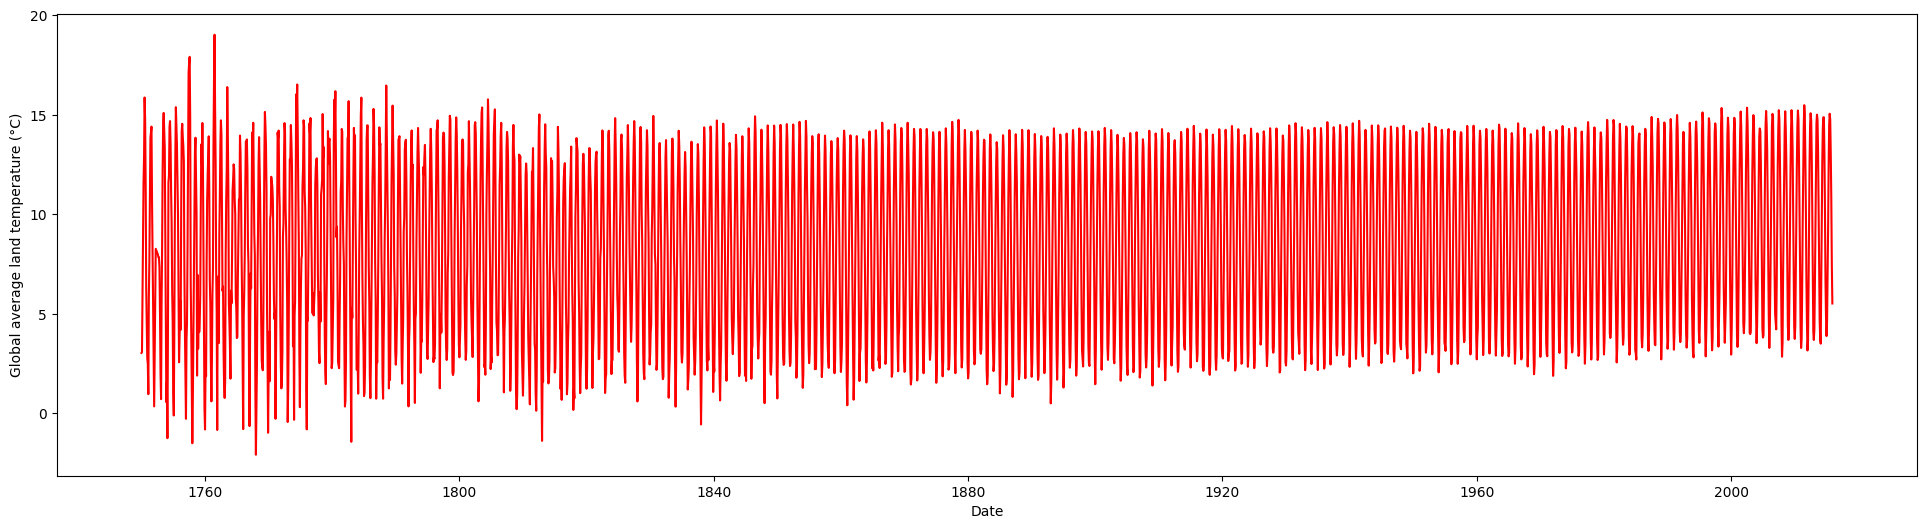

In [24]:
plt.figure(figsize=(24,6))

sns.lineplot(data=globaltemp['landavgtemp'], color="red")
plt.xlabel('Date')
plt.ylabel('Global average land temperature (°C)')

We see that the graph fluctuates drastically. Visually, this yields a long, thick shaded area which does not help much on data analysis, even though we have already set figsize=(24,6) so that the width of the graph is four times of the height.

Domain knowledge of Earth science suggests that the fluctuation is actually normal -- it displays the periodic seasonal variation that occurs all the time. Indeed, we can observe this from a small fraction of the line chart, says, within a five-year period:

Text(0, 0.5, 'Global average land temperature (°C)')

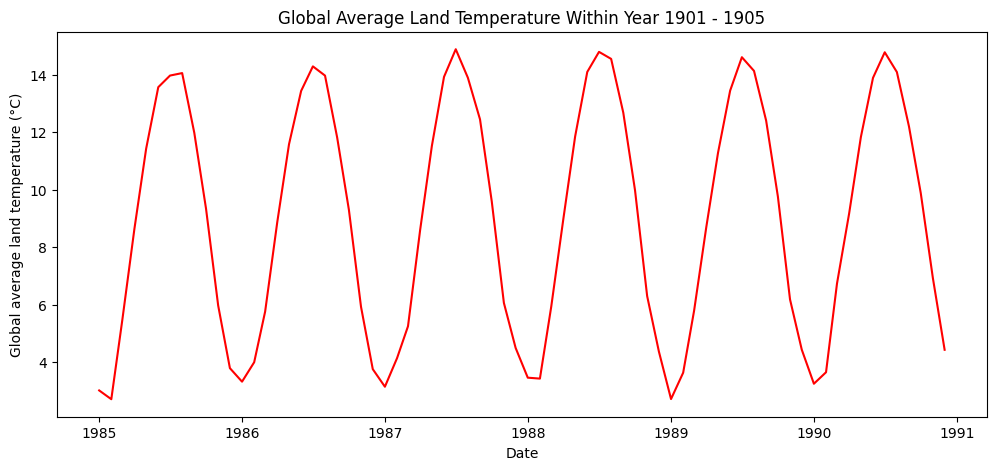

In [25]:
plt.figure(figsize=(12,5))

sns.lineplot(data=globaltemp['landavgtemp'].loc[
    (globaltemp.index.year >= 1985) & (globaltemp.index.year <= 1990)
], color="red")
plt.title('Global Average Land Temperature Within Year 1901 - 1905')
plt.xlabel('Date')
plt.ylabel('Global average land temperature (°C)')

Indeed, for every year, the temperature first rises to the peak around the mid-year, then descend back, at the end of that year, to a temperature that is similar to the temperature of the beginning of that year. The lower temperature at the beginning and the end of the year represent the winter season, while the higher temperature near the peak represents the summer season. This is the seasonal variation displayed in the data.

To achieve the goal of observing the trend of the temperature over the years, we shall first make a seasonal adjustment to eliminate the seasonal variation above. For every year, we will take the average of the temperatures of the twelve months in this year, and take all of these annual average as our new data (represented as a Series) to plot a new line chart.

Text(0, 0.5, 'Global average land temperature (°C)')

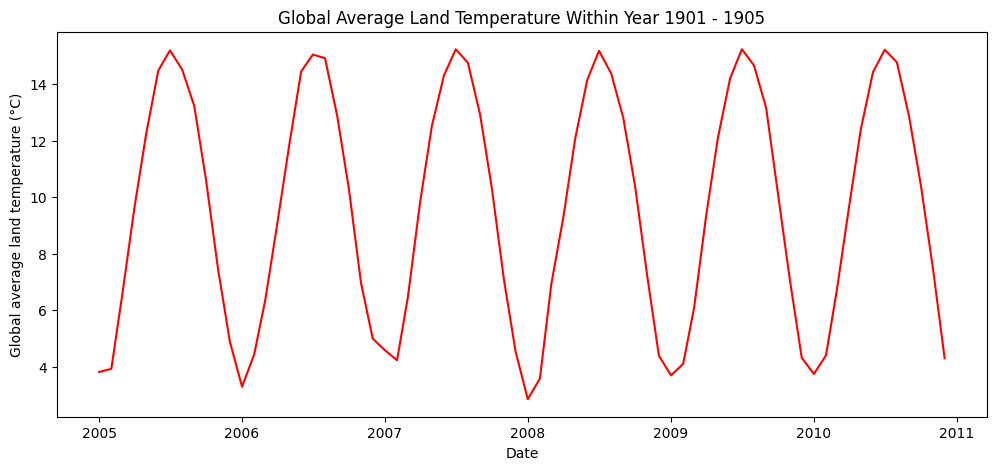

In [26]:
plt.figure(figsize=(12,5))

sns.lineplot(data=globaltemp['landavgtemp'].loc[
    (globaltemp.index.year >= 2005) & (globaltemp.index.year <= 2010)
],color="red")
plt.title('Global Average Land Temperature Within Year 1901 - 1905')
plt.xlabel('Date')
plt.ylabel('Global average land temperature (°C)')

We first gather the years into a list

In [27]:
years = list(globaltemp.index.year.unique())

Then, we compute the annual average described above:

In [28]:
annualavg = []
for year in years:
    
    current_year_data = globaltemp.loc[globaltemp.index.year == year]
    annualavg.append(current_year_data.landavgtemp.mean()) 
    

landannavgtemp = pd.Series(annualavg, index=years)



Text(0, 0.5, 'Global annual average land temperature (°C)')

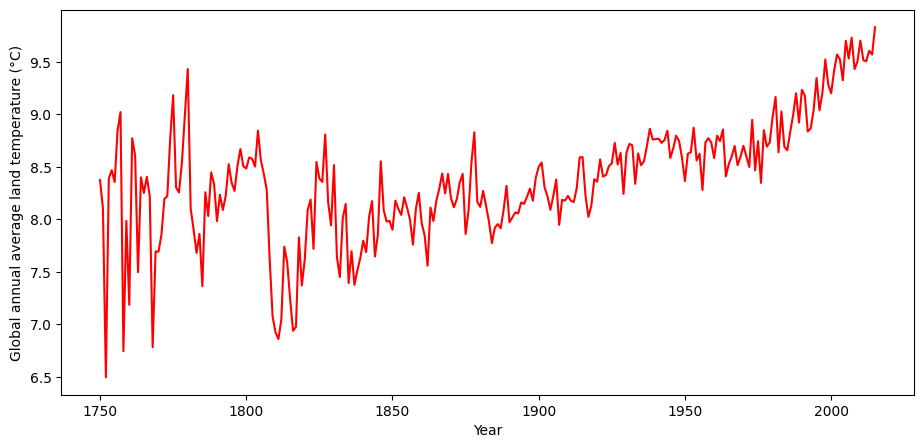

In [29]:
plt.figure(figsize=(11,5))

sns.lineplot(data=landannavgtemp, color="red")
plt.xlabel('Year')
plt.ylabel('Global annual average land temperature (°C)')

The global annual average land temperature (simply referred to as the 'temperature' in this cell) has a more drastic fluctuation between 1750 and 1850. There are (at least) two possibilities: One is that the data reflects genuinely the actual event on Earth at that period of time, which means that there was a period of time where people around the world have to experience a more varying temperature -- perhaps an uncomfortable one. \ Another possibility is that the measurement of temperature at that time was not as precise as that of the later period, which therefore resulted in a greater variation.

From roughly the year 1850 onwards, the temperature follows an overall trend of increasing while remains to have fluctuations.

However, note that while the increment from 1850 to roughly 1975 (the center between 1950 and 2000) is relatively more moderate, the increment from roughly the year 1975 onwards is relatively faster/steeper -- the straight line that approximates the growth has a higher slope. It reaches the highest point throughout the whole 1750 - 2015 period at precisely the last year -- year 2015.

Text(0, 0.5, 'Uncertainty (°C)')

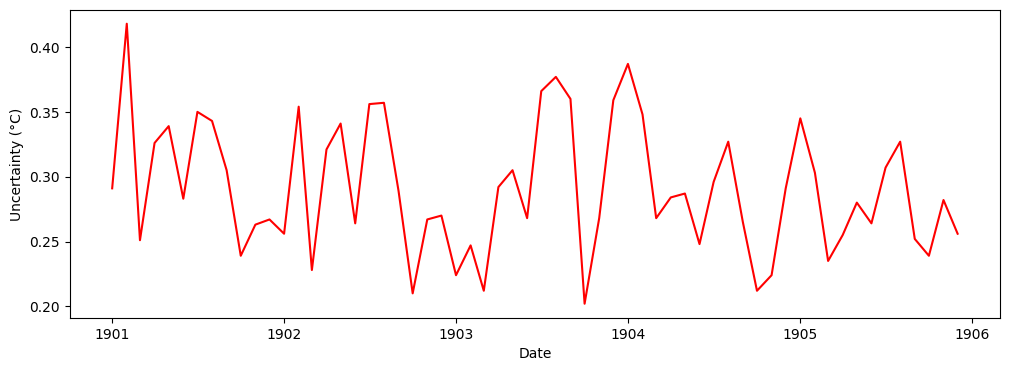

In [30]:
plt.figure(figsize=(12,4))

sns.lineplot(data=globaltemp['landavgtemp2sigmas'].loc[
    (globaltemp.index.year >= 1901) & (globaltemp.index.year <= 1905)
], color="red")
plt.xlabel('Date')
plt.ylabel('Uncertainty (°C)')

which clearly does not display any periodic pattern.

Nevertheless we will do the same for the data in the column 'land_avg_temp_2sigmas'; namely we shall take the (appropriate) average of the uncertainties of the twelve months of a year, as the uncertainty representing that year.

In [31]:

globaltemp['landavgtempvar'] = (globaltemp.landavgtemp2sigmas / 2) ** 2

annual2std = []
for year in years:
    
    currentyearlandavgvar = globaltemp.loc[globaltemp.index.year == year]
    
    annual2std.append(
        (ma.sqrt(currentyearlandavgvar.landavgtempvar.sum()) / 12) * 2
    )
    
landannavgtemp2sigmas = pd.Series(annual2std, index=years)

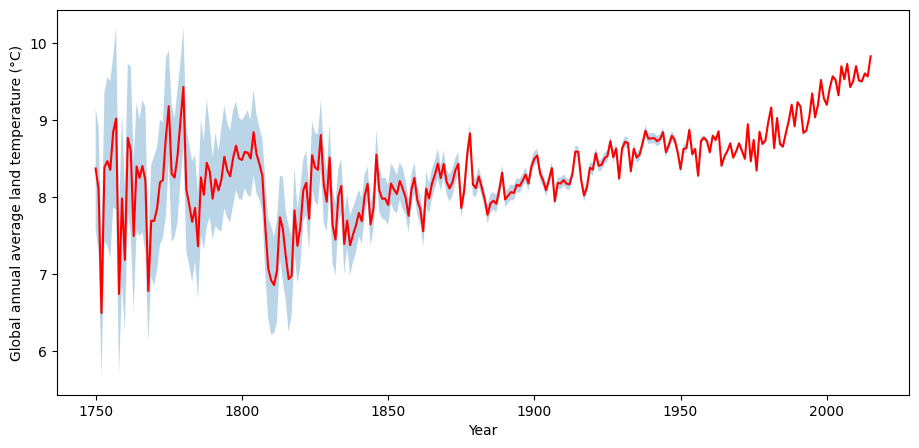

In [32]:
fig,ax = plt.subplots(figsize=(11,5))

sns.lineplot(data=landannavgtemp, color="red")
plt.xlabel('Year')
plt.ylabel('Global annual average land temperature (°C)')

ax.fill_between(landannavgtemp.index, 
                landannavgtemp - landannavgtemp2sigmas, 
                landannavgtemp + landannavgtemp2sigmas, 
                alpha=0.3)

We see that:

The confidence band is visibly thicker within the period 1750 - 1850. This thickness represents the relatively higher uncertainty in the measurement of land_avg_temp. It may possibly reflect the fact that the technology at that period is not advance enough to carry out measurements of temperature with higher precision.

The band becomes thinner starting from roughly the year 1900 onwards. Stepping into the 20th century, the science became more advance and people have better instruments or methods to measure the temperature more precisely.

The band is even nearly invisible from roughly 1960 onwards. We see that the current technology is able to make measurement with very small uncertainty.

Consequently, while the real temperature during the period 1750 - 1850 may be debatable, we are quite confident that the data from year 1900 onwards do reflect the true global land average temperature within this period. There is therefore very little room to argue, in the direction of imprecision of data, that the global warming is not happening at the present time.

For Global Maximum Land temperature we do the same using the Landmaxtemp column.

Text(0, 0.5, 'Global maximum land temperature (°C)')

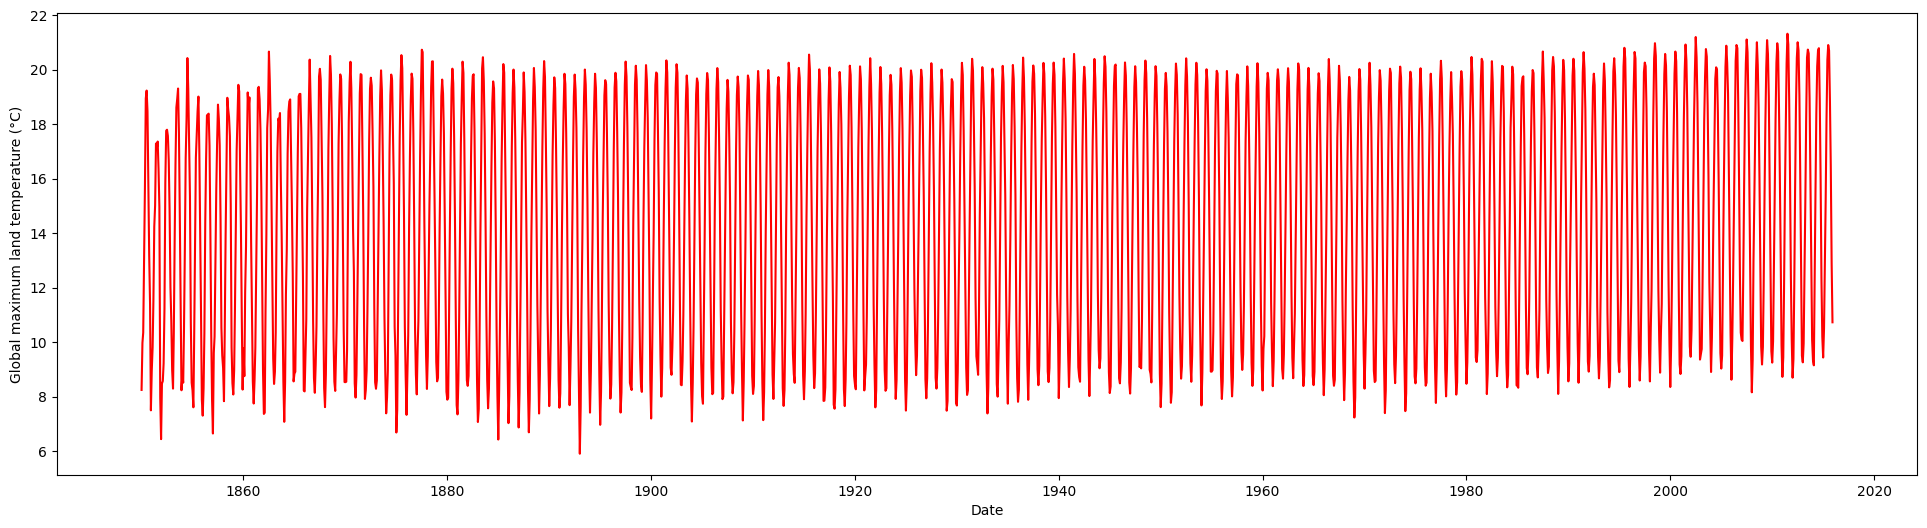

In [33]:
plt.figure(figsize=(24,6))

sns.lineplot(data=globaltemp['landmaxtemp'], color="red")
plt.xlabel('Date')
plt.ylabel('Global maximum land temperature (°C)')


Similar to the previous case, we observe drastic fluctuations all over the graph. We expect the same seasonal variation as described above being also present in the data. The following small fragment of the line chart above, which is also within the period 1901 - 1905, suggests that this is indeed the case:

Text(0, 0.5, 'Global maximum land temperature (°C)')

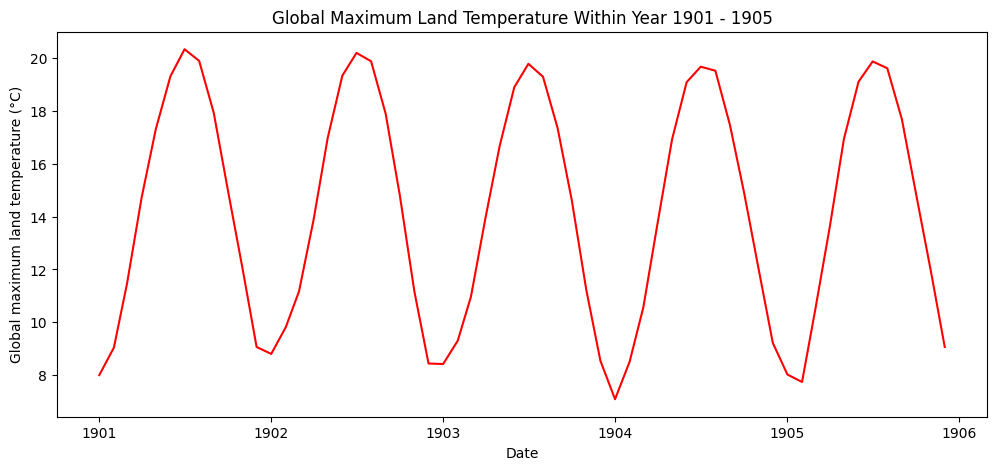

In [34]:
plt.figure(figsize=(12,5))

sns.lineplot(data=globaltemp['landmaxtemp'].loc[
    (globaltemp.index.year >= 1901) & (globaltemp.index.year <= 1905)
], color="red")
plt.title('Global Maximum Land Temperature Within Year 1901 - 1905')
plt.xlabel('Date')
plt.ylabel('Global maximum land temperature (°C)')

For the Landmaxtemp we only have data form 1850 onwards. We there have to explicitly tell the processor to ingnore any rows that come fore that sine there dont have any values.

Thus, we may follow the very same procedure as the previous case to carry out the data visualization and data analysis. Namely, we make a seasonal adjustment by taking the average (of max temperature) for each year, in order to see the trend over the years. Then, we include the information of uncertainty as well into the line chart, first by taking the appropriate average (see the formula above), then by plotting out the confidence band.

We will therefore do these in a relatively faster pace, without much explanation (the readers may always refer to the previous case).

In [35]:
yr1850_onwards = list(globaltemp.loc[~globaltemp.landmaxtemp.isnull()].index.year.unique())

In [36]:
annualmax = []
for year in yr1850_onwards:
    currentyearmax = globaltemp.loc[globaltemp.index.year == year]
    annualmax.append(currentyearmax.landmaxtemp.mean()) 
    

landannmaxtemp = pd.Series(annualmax, index=yr1850_onwards)



In [37]:
globaltemp['landmaxtempvar'] = (globaltemp.landmaxtemp2sigmas / 2) ** 2


annualmax2std = []
for year in yr1850_onwards:
    currentyearmaxvar = globaltemp.loc[globaltemp.index.year == year]
    annualmax2std.append(
        (ma.sqrt(currentyearmaxvar.landmaxtempvar.sum()) / 12) * 2
    )
    
# Create a new Series
landannmaxtemp2sigmas = pd.Series(annualmax2std, index=yr1850_onwards)

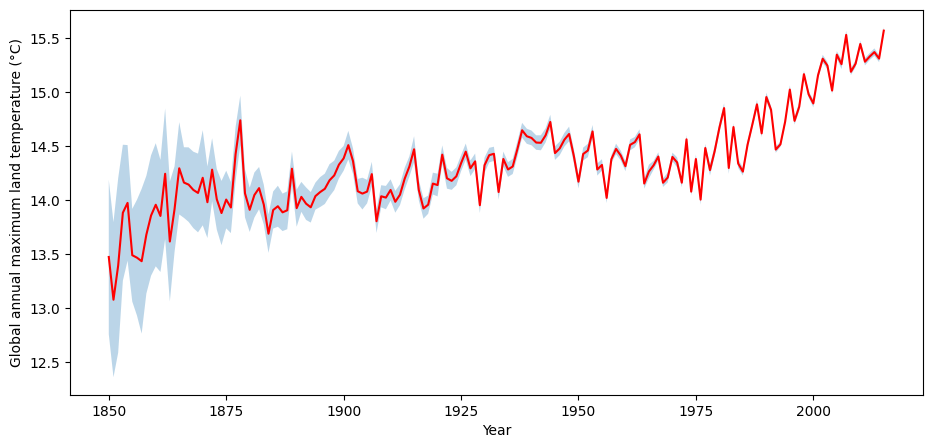

In [38]:
fig,ax = plt.subplots(figsize=(11,5))

sns.lineplot(data=landannmaxtemp, color="red")
plt.xlabel('Year')
plt.ylabel('Global annual maximum land temperature (°C)')

ax.fill_between(landannmaxtemp.index, 
                landannmaxtemp - landannmaxtemp2sigmas, 
                landannmaxtemp + landannmaxtemp2sigmas, 
                alpha=0.3)

Do the same for the Global minimum temperature




Text(0, 0.5, 'Global minimum land temperature (°C)')

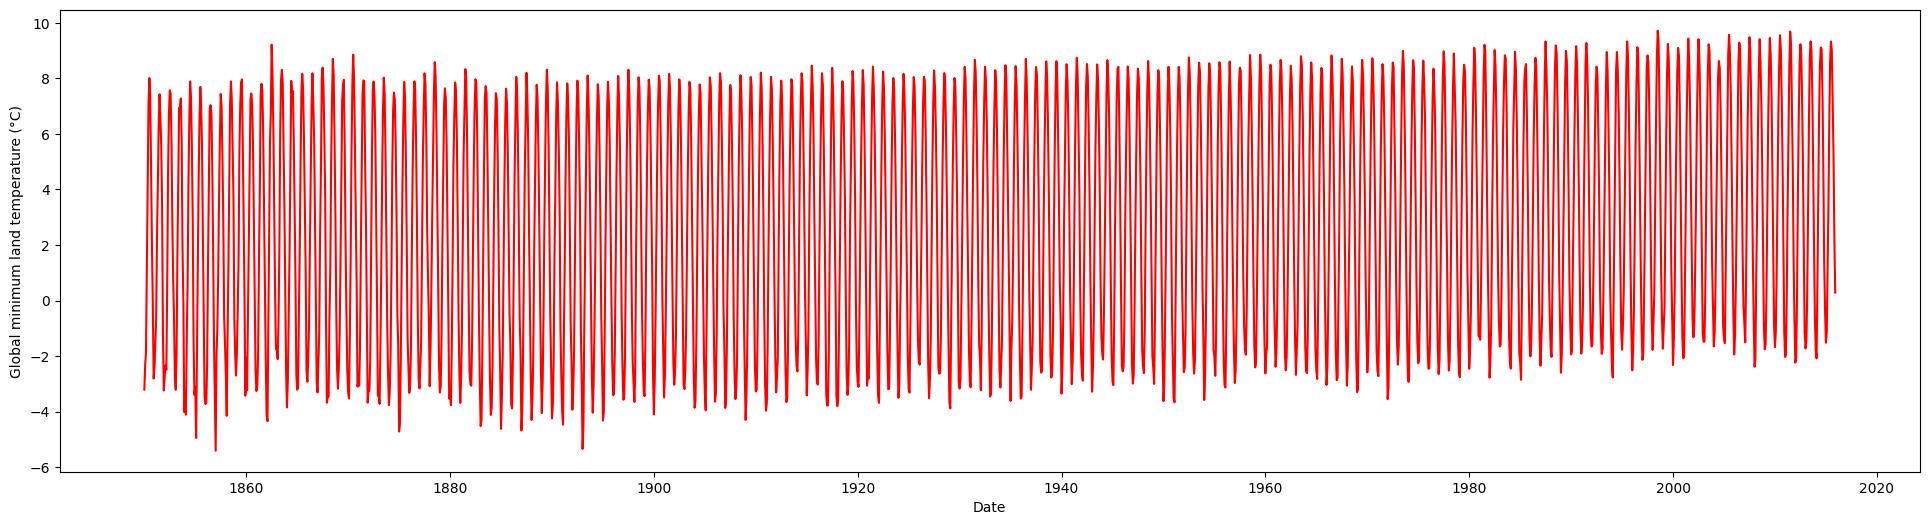

In [40]:
plt.figure(figsize=(24,6))

sns.lineplot(data=globaltemp['landmintemp'], color="red")
plt.xlabel('Date')
plt.ylabel('Global minimum land temperature (°C)')

We observe that:

The overall trend is similar to the previous case of average temperature.

For example, the fluctuations are heavier between 1850 and 1900, especially around year 1875. Note, however, that these fluctuations are not as drastic as those appear in the previous case of average temperature within the period 1750 - 1850.

Overall, the temperature is increasing throughout the years. While the increment is steadier between 1900 and 1975, it becomes faster from roughly 1975 onwards. The straight line that approximates the trend has a greater slope within the period 1975 - 2015. The maximum temperature reaches the highest values in the most recent 10 to 15 years.

Similar to the previous case, the uncertainty is relatively larger at the beginning, while becoming quite negligible in the most recent decades. This is illustrated by the thicker confidence band at the left hand side of the graph. The band becomes much thinner as one starts to move to the right, and even become nearly invisible at the rightmost of the graph.

Text(0, 0.5, 'Global minimum land temperature (°C)')

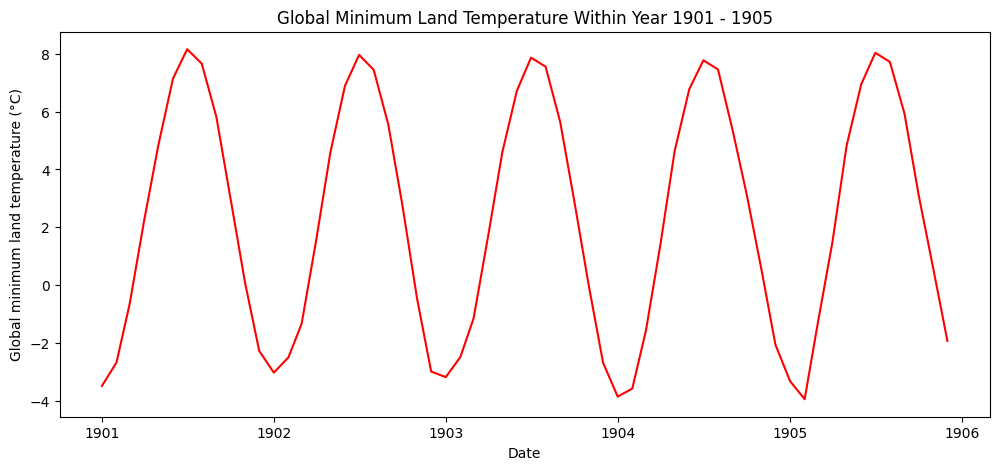

In [41]:
plt.figure(figsize=(12,5))

sns.lineplot(data=globaltemp['landmintemp'].loc[
    (globaltemp.index.year >= 1901) & (globaltemp.index.year <= 1905)
], color="red")
plt.title('Global Minimum Land Temperature Within Year 1901 - 1905')
plt.xlabel('Date')
plt.ylabel('Global minimum land temperature (°C)')

The first graph above displays the drastic fluctuations similar to the previous two cases (average and maximum). The second graph above shows that it is due to the same seasonal variation. Therefore, the remaining procedure will again be the same as the previous two cases. In fact the code will be the same as above, except that when naming the variables one changes 'max' to 'min':

In [42]:
annualmin = []
for year in yr1850_onwards:
    currentyearmin = globaltemp.loc[globaltemp.index.year == year]
    annualmin.append(currentyearmin.landmintemp.mean()) 
     
landannmintemp = pd.Series(annualmin, index=yr1850_onwards)
globaltemp['landmintempvar'] = (globaltemp.landmintemp2sigmas / 2) ** 2


annualmin2std = []
for year in yr1850_onwards:
    currentyearminvar = globaltemp.loc[globaltemp.index.year == year]
    annualmin2std.append(
        (ma.sqrt(currentyearminvar.landmintempvar.sum()) / 12) * 2
    )
    

landannmintemp2sigmas = pd.Series(annualmin2std, index=yr1850_onwards)

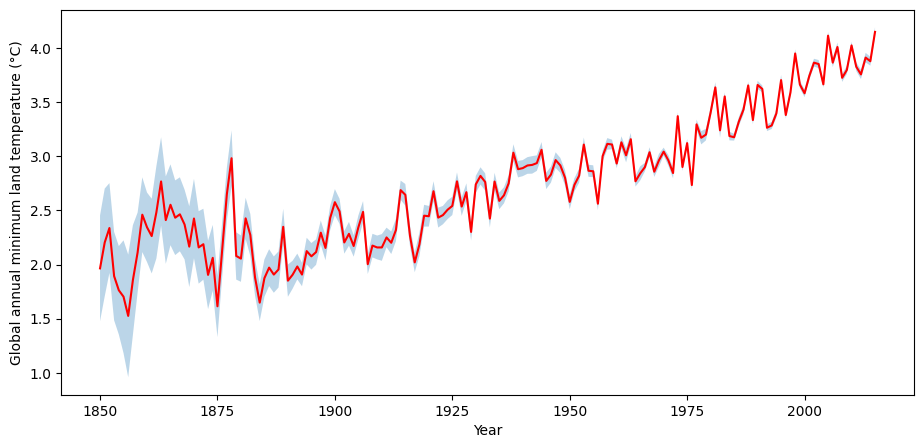

In [44]:
fig,ax = plt.subplots(figsize=(11,5))

sns.lineplot(data=landannmintemp, color="red")
plt.xlabel('Year')
plt.ylabel('Global annual minimum land temperature (°C)')

ax.fill_between(landannmintemp.index, 
                landannmintemp - landannmintemp2sigmas, 
                landannmintemp + landannmintemp2sigmas, 
                alpha=0.3)

Observations:

The overall trend is again similar to the previous two cases of average and maximum temperature.

The fluctuations are again heavier between 1875 and 1900, and especially near around 1875. Similar to the previous case of maximum temperature, these fluctuations are, nevertheless, not as drastic as those within the period 1750 - 1850 for the average temperature.

Again, the temperature is increasing overall as time passes, and reaching the peak at the most recent time. Note, however, one small difference here from the previous two cases which is that the increment follows the same rate from 1900 onwards and seems to not become visibly faster from 1975 onwards. This may suggest that the minimum temperature is growing in a more normal pace than the average and maximum temperatures.

Again, the confidence band obeys the same pattern as the previous two cases; that is, it is thicker at the beginning, then becomes thinner as one moves to the right hand side, and becomes nearly invisible atthe rightmost of the graph. This reflects the same pattern of uncertainity in the measurement as the previous two cases.

Text(0, 0.5, 'Temperature (°C)')

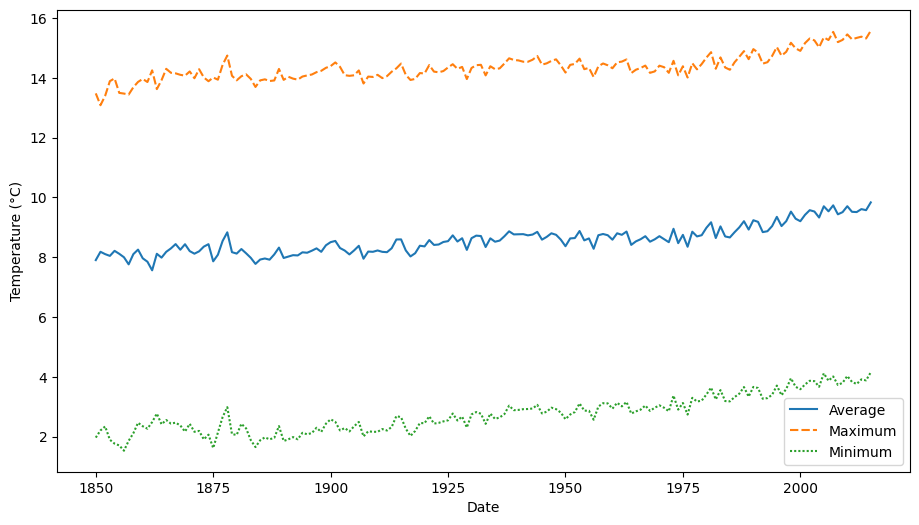

In [45]:
land_ann_3temps = pd.concat([
    landannavgtemp.loc[landannavgtemp.index >= 1850],
    landannmaxtemp, 
    landannmintemp
],axis=1).rename(columns={
    0:'Average', 1:'Maximum', 2:'Minimum'
})


plt.figure(figsize=(11,6))

sns.lineplot(data=land_ann_3temps)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')


For Global average land Ocean temperature do the same

Text(0, 0.5, 'Global average land-and-ocean temperature (°C)')

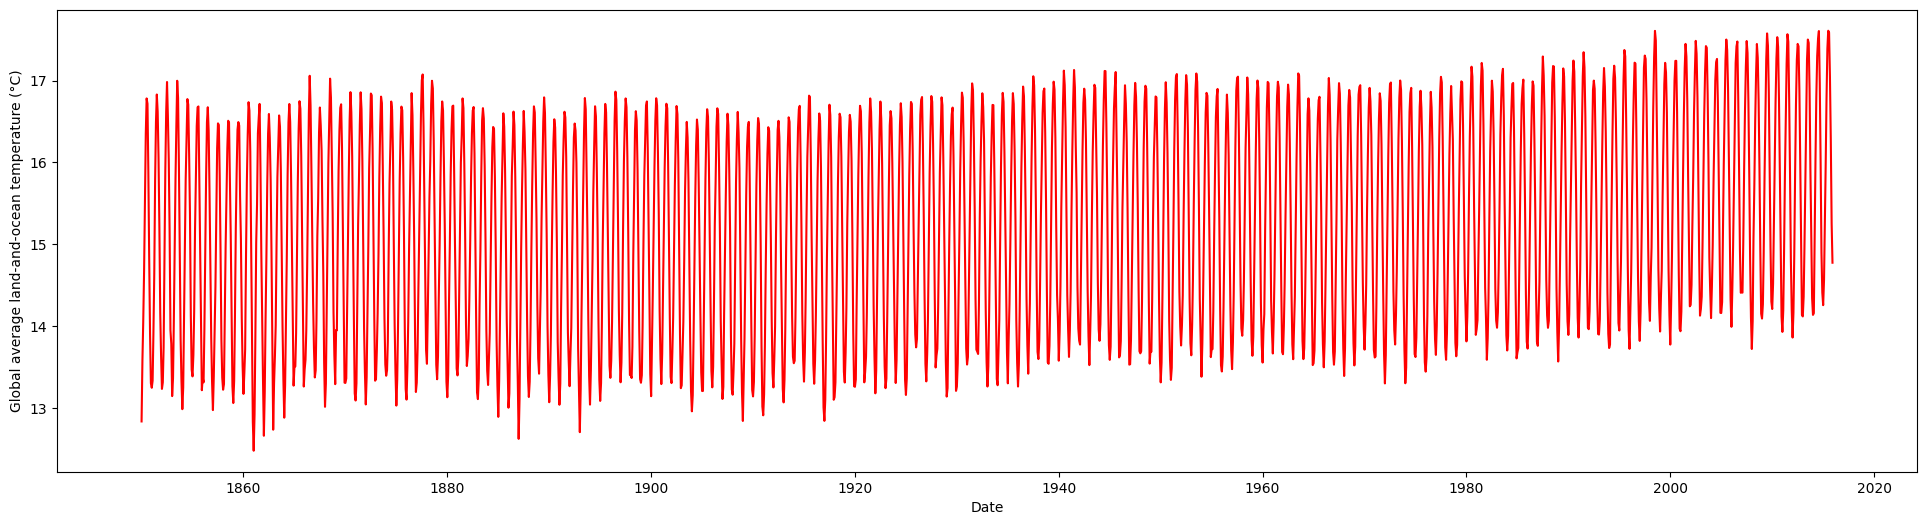

In [47]:
plt.figure(figsize=(24,6))

sns.lineplot(data=globaltemp['landoceanavgtemp'], color="red")
plt.xlabel('Date')
plt.ylabel('Global average land-and-ocean temperature (°C)')

we observe the same dractic fluctuations as before. By now we are confident that this is precisely due to the seasonal variation that happens all the time. As before, we may look at a small fraction of the line chart to double check the periodicity:

Text(0, 0.5, 'Global average land-and-ocean temperature (°C)')

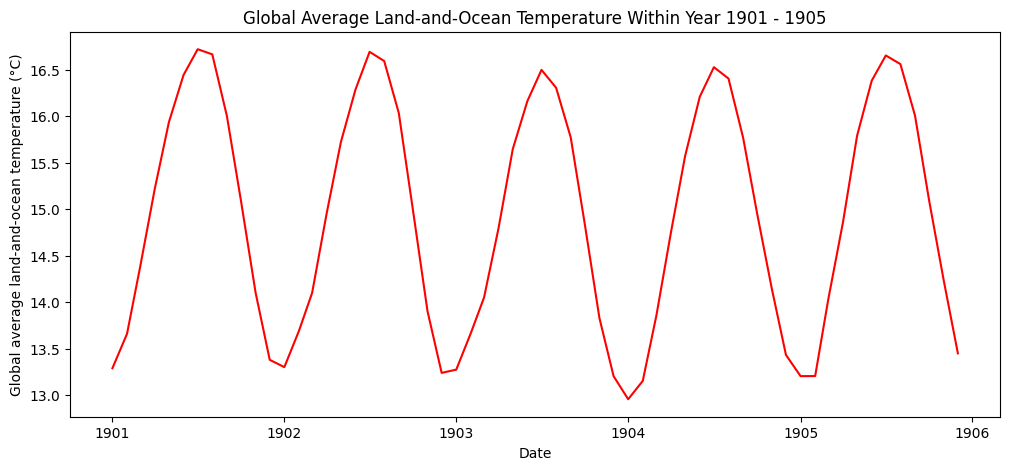

In [49]:
plt.figure(figsize=(12,5))

sns.lineplot(data=globaltemp['landoceanavgtemp'].loc[
    (globaltemp.index.year >= 1901) & (globaltemp.index.year <= 1905)
], color="red")
plt.title('Global Average Land-and-Ocean Temperature Within Year 1901 - 1905')
plt.xlabel('Date')
plt.ylabel('Global average land-and-ocean temperature (°C)')

In [51]:
ann_lo = [] 
for year in yr1850_onwards:
    currentyearlo = globaltemp.loc[globaltemp.index.year == year]
    ann_lo.append(currentyearlo.landoceanavgtemp.mean())  
    

landoceanannavgtemp = pd.Series(ann_lo, index=yr1850_onwards)
globaltemp['landoceanavgtempvar'] = (globaltemp.landoceanavgtemp2sigmas / 2) ** 2


ann_lo_2std = []
for year in yr1850_onwards:
    currentyearlovar = globaltemp.loc[globaltemp.index.year == year]
    ann_lo_2std.append(
        (ma.sqrt(currentyearlovar.landoceanavgtempvar.sum()) / 12) * 2
    )

landoceanannavgtemp2sigmas = pd.Series(ann_lo_2std, index=yr1850_onwards)


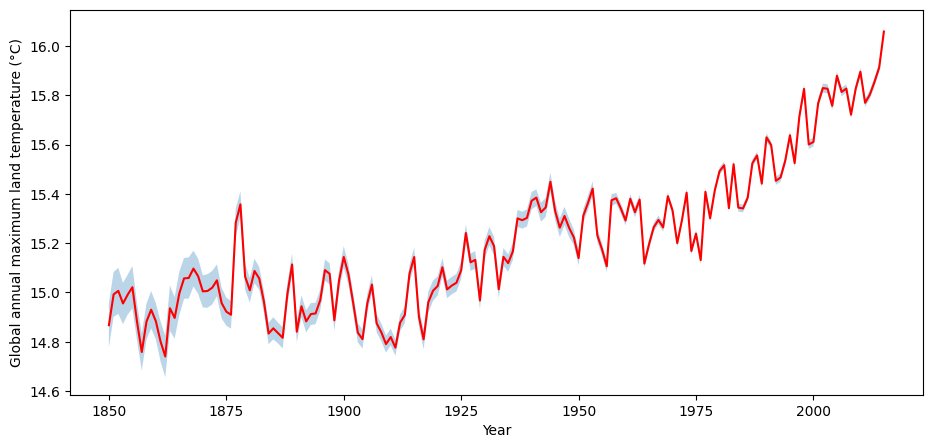

In [53]:
fig,ax = plt.subplots(figsize=(11,5))

sns.lineplot(data=landoceanannavgtemp, color="red")
plt.xlabel('Year')
plt.ylabel('Global annual maximum land temperature (°C)')

ax.fill_between(landoceanannavgtemp.index, 
                landoceanannavgtemp - landoceanannavgtemp2sigmas, 
                landoceanannavgtemp + landoceanannavgtemp2sigmas, 
                alpha=0.3)

The graph is very similar to the previous cases. The most notable difference is that the confidence band is not as thick as the land-only case, especially in the early period 1850 - 1900. Domain knowledge in natural science suggests that this smaller uncertainty may be due to the temperature stability of water, which in turn due to the high specific heat capacity of H2O.

Finally, let us also compare the line charts for the land-only case with the land-and-ocean case:

Text(0, 0.5, 'Temperature (°C)')

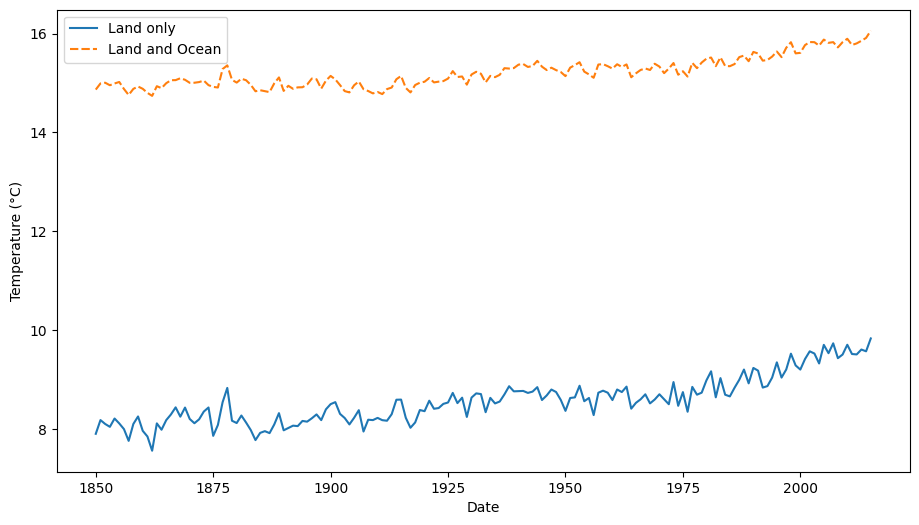

In [57]:
land_vs_lo_ann = pd.concat([
    landannavgtemp.loc[landannavgtemp.index >= 1850],
    landoceanannavgtemp
],axis=1).rename(columns={
    0:'Land only', 1:'Land and Ocean'
})


plt.figure(figsize=(11,6))

sns.lineplot(data=land_vs_lo_ann)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')


There are two main highlights:

The land-and-ocean temperature is in general higher than the land-only temperature. This may again be due to the specific heat capacity of water, which allows the whole water body of the ocean to store a substantial amount of heat in a stable manner.

The land-and-ocean temperature also displays slightly less fluctuations than the land-only temperature. Again, this may due to the temperature stability of water we described above.